<a href="https://colab.research.google.com/github/aryafikriii/CB2/blob/main/1301204066_CaseBased2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBRARY**

In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action="ignore", category = FutureWarning)
pd.options.mode.chained_assignment = None

**EKSPLORASI DATA**

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/aryafikriii/CB2/main/Country-data.csv")

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Unsupervised Learning on Country Data merupakan dataset dari banyak negara yang memiliki beberapa fitur. Nantinya tiap negara akan dicluster berdasarkan tingkat kesejahteraannya. Apakah negara tersebut tidak perlu dibantu, mungkin perlu dibantu, atau sangat perlu dibantu. Berikut fitur yang terdapat pada dataset:

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/aryafikriii/CB2/main/data-dictionary.csv")
for i in range(len(data['Column Name'])):
    print(data['Column Name'][i],'    \t |',data['Description'][i])

country     	 | Name of the country
child_mort     	 | Death of children under 5 years of age per 1000 live births
exports     	 | Exports of goods and services per capita. Given as %age of the GDP per capita
health     	 | Total health spending per capita. Given as %age of GDP per capita
imports     	 | Imports of goods and services per capita. Given as %age of the GDP per capita
Income     	 | Net income per person
Inflation     	 | The measurement of the annual growth rate of the Total GDP
life_expec     	 | The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer     	 | The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp     	 | The GDP per capita. Calculated as the Total GDP divided by the total population.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


df.info() digunakan untuk mengetahui fitur apa saja yang ada dalam suatu dataset serta memberikan informasi ada tidaknya data yang kosong pada tiap kolomnya. Hal ini sangat penting karena data yang kosong tidak bisa diolah dan harus dihapus dari dataset. dataset.info() juga memberikan informasi tipe data apa yang dimiliki dari tiap fitur pada suatu dataset yang diolah

In [7]:
df.shape

(167, 10)

df.shape digunakan untuk mengetahui berapa jumlah baris dan kolom yang ada dari suatu dataset yang akan kita olah, pada contoh ini dataset learning on country memiliki 167 baris dan 10 fitur (kolom)

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


df.describe() digunakan untuk mengetahui nilai statistika dari suatu dataset. Nilai ini meliputi count, mean, std, min, kuartil-I, kuartil-II, kuartil-III, dan terakhir kuartil-IV dari suatu dataset

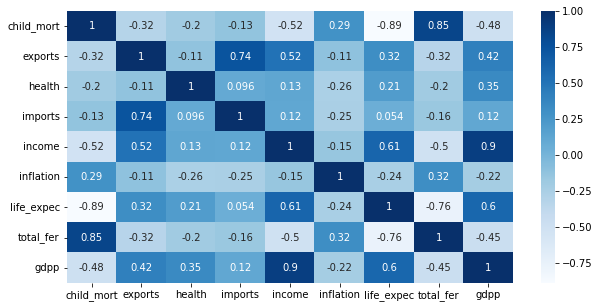

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Kode diatas digunakan untuk menampilkan kolerasi dari data yang terdapat pada dataset

**PRE-PROCESSING DATA**

In [10]:
data = df.duplicated()
data.sum()


0

Kode diatas digunakan untuk memeriksa apakah terdapat duplikasi data pada dataset

In [11]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Kode diatas digunakan untuk memeriksa apakah terdapat data yang kosong pada dataset

In [12]:
data = df.drop("country", axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Penghapusan kolom country karena country nilainya selalu unique

In [13]:
def MinMax_scaler(df) :
    return (df.iloc[:,1:10] - df.iloc[:,1:10].min()) / (df.iloc[:,1:10].max() - df.iloc[:,1:10].min())

df_scaling = MinMax_scaler(df)
df_scaling

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


fungsi MinMax_scaler adalah untuk menormalisasikan data, yaitu membuat data menjadi normal sehingga tidak ada value dari data yang terlalu kecil ataupun terlalu besar. Hal ini perlu dilakukan karena terkadang value data yang terlalu kecil tidak terlalu memiliki pengaruh yang signifikan jika dibandingkan dengan data yang memiliki value terlalu besar

**MODEL**

**K-MEANS**

In [14]:
def distance(df, centroid):
  dist = 0
  for i in range(len(df)):
    dist += abs(df[i]-centroid[i])
  return dist

def init_centroid(df):
  random.seed(10)
  centroid_list = []
  centroid = []
  for i in range(0, 3):
    for j in range(0, 9):
      centroid.append(random.uniform(0,1))
    centroid_list.append(centroid)
    centroid = []
  return centroid_list

def dist_centroid(df, centroid_list):
  dist_list = []
  centorid_selected_list = []
  for i in range(len(df)):
    data = list(df.iloc[i])
    for j in range(len(centroid_list)):
      centroid = centroid_list[j]
      jarak = distance(data, centroid)
      dist_list.append(jarak)
    centorid_selected = min(dist_list)
    centorid_selected_list.append(dist_list.index(centorid_selected))
    dist_list = []
    
  return centorid_selected_list
  
def make_new_centroid(df, centorid_selected_list):
  index = []
  centroid = []
  new_list_centroid = []
  for i in range(0, 3):
    for j in range(len(centorid_selected_list)):
      point = centorid_selected_list[j]
      if point == i:
        index.append(j)
      
    firstData = True
    for x in index:
      data = list(df.iloc[x])
      if firstData == False:
        jml = [i+j for i,j in zip(jml, data)] 
      else:
        jml = data
        firstData = False    


    divider = []
    for y in range(len(jml)):
      divider.append(len(index))
      
    centroid = [i/j for i,j in zip(jml, divider)]
    new_list_centroid.append(centroid)
    index = []
    centroid = []

  return new_list_centroid

**HASIL DARI IMPLEMENTASI KMEANS**

In [15]:
centroid_awal = init_centroid(df_scaling)
list_centroid = centroid_awal

for i in range(20):
  centroid_terpilih = dist_centroid(df_scaling, list_centroid)
  new_centroid = make_new_centroid(df_scaling, centroid_terpilih)

  if new_centroid == list_centroid:
    break
  else:
    list_centroid = new_centroid

  print(list_centroid)
  final_cluster = dist_centroid(df_scaling, list_centroid)

[[0.042385016323958996, 0.2548365329692918, 0.357766972544145, 0.25349516248496684, 0.26192527641729324, 0.09395837070619767, 0.8908516069149552, 0.12070885136388938, 0.2602338590276761], [0.24513145082765342, 0.1702232503948695, 0.2830686431376697, 0.28144501952298473, 0.045999770456130365, 0.12128741002031126, 0.6754165092953962, 0.37022618967715953, 0.027191838254900395], [0.6153846153846154, 0.18475569185205937, 0.2036047234307023, 0.2528204647622289, 0.012988077915604825, 0.14335089178449312, 0.5203155818540434, 0.870031545741325, 0.008899579073962717]]
[[0.02977502178035156, 0.2575953894872706, 0.3674479081482451, 0.28327361975175175, 0.2452280140423088, 0.08299164879206612, 0.8979808989930446, 0.10347833305661629, 0.2403174201287947], [0.2113531660102603, 0.16728340826347374, 0.25794272886654357, 0.2702902738588238, 0.04564290956885228, 0.12407893992747657, 0.6933969207218346, 0.33123028391167186, 0.02590603378605641], [0.5240790327815645, 0.1445170951501902, 0.2811010979904703,

In [16]:
cluster = {"cluster": final_cluster}
cluster = pd.DataFrame(cluster)

df["cluster"] = cluster
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


**EVALUASI**

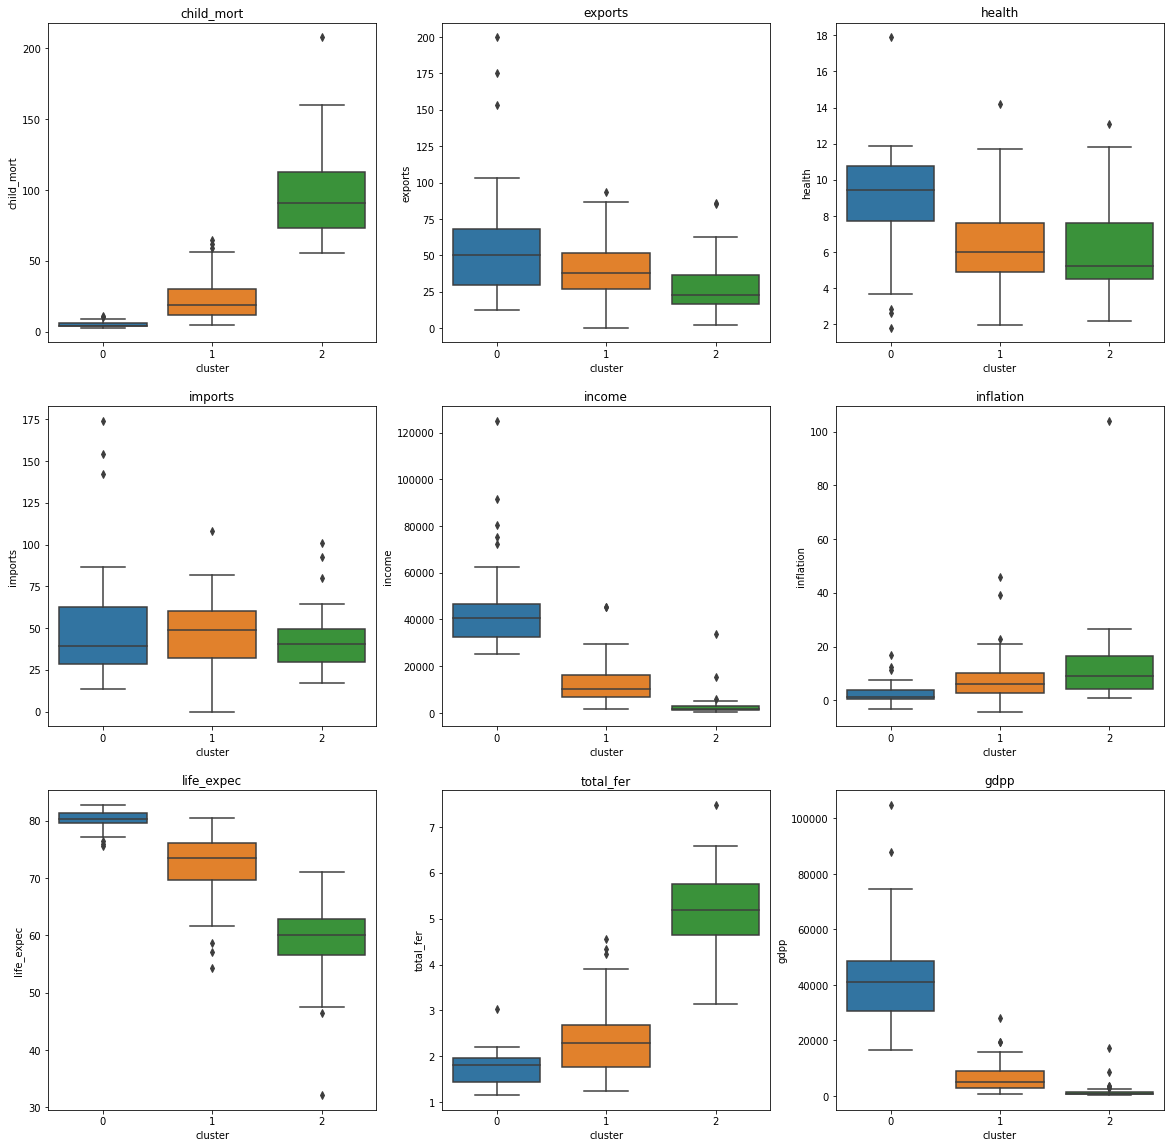

In [17]:
l=['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(df.cluster,df[l[i]])
    plt.title(l[i])

**Pengamatan Grafik:**

*   Grafik antara Cluster dan child_mort menunjukkan bahwa ada jumlah kematian yang lebih besar (berkisar antara 60 hingga 220) di bawah 5 tahun anak di cluster no 2 (mungkin karena masalah kesehatan dan kondisi keamanan negara). yang lebih banyak dibandingkan dengan cluster 0 dan 1 .
*   Grafik antara Cluster dan ekspor menunjukkan bahwa tidak ada ekspor di cluster 2 yang berkisar antara 20 hingga 40 yang lebih sedikit dibandingkan dengan cluster 0 dan 1.
*   Grafik antara Cluster dan kesehatan menunjukkan bahwa ada lebih sedikit pengeluaran untuk kesehatan di Cluster 2 dibandingkan dengan cluster 0 dan 1.
*   Grafik antara Cluster dan pendapatan menunjukkan bahwa ada lebih sedikit kisaran pendapatan di Cluster 2 dibandingkan dengan 0 dan 1.
*   Ada lebih banyak inflasi di klaster 2.
*   life_expec kisaran kurang di cluster 2.
*   Grafik antara Cluster dan total_fer menunjukkan bahwa populasi meningkat pesat di cluster 2
*   GDPP kurang di Cluster 2.

**Semua hasil ini menunjukkan bahwa LSM HELP harus lebih fokus pada negara yang berada di cluster 2**








In [18]:
df_final_0 = df[df['cluster'] == 0]
df_final_1 = df[df['cluster'] == 1]
df_final_2 = df[df['cluster'] == 2]

In [19]:
df_final_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0


In [20]:
print(df_final_0['country'])

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United

In [21]:
df_final_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,1
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,1
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,1
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1


In [22]:
df_final_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2


Refrensi 

1. Salindia 07 - K-Means dan DBSCAN Pembelajaran Mesin
2. Kokkula. R, "Unsupervised Learning on Country Data", https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
3. Abdulhaq, "Simple and Easy step by step Explanation KMeans", https://www.kaggle.com/code/abdulhaq786/simple-and-easy-step-by-step-explanation-kmeans
4. Fariz, Gybran. M. C, Calvindro. S. T, Tsany. M. H, Wijaya. A. C, Multazam. I. H, "Clustering-Unsupervised Learning on Country Data", https://www.kaggle.com/code/warungsederhana/clustering-unsupervised-learning-on-country-data